# Lending Club Case Study 

### Data Sourcing - Upload Data

In [1]:
# import library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load csv file in dataframe df1
df1 = pd.read_csv('H://rohit//upgrad//lending club case study//loan.csv',low_memory=False,error_bad_lines=False,parse_dates=["issue_d"])

### Data Cleaning

#### Fix Rows and Coulmns

In [3]:
# Check shape of dataframe
df1.shape

(39717, 111)

(39717, 111)

In [4]:
# Check column Names
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
# Check whether extra columns are uploaded
list = ["id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl","inq_last_12m","acc_open_past_24mths","avg_cur_bal","bc_open_to_buy","bc_util","chargeoff_within_12_mths","delinq_amnt","mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op","mo_sin_rcnt_tl","mort_acc","mths_since_recent_bc","mths_since_recent_bc_dlq","mths_since_recent_inq","mths_since_recent_revol_delinq","num_accts_ever_120_pd","num_actv_bc_tl","num_actv_rev_tl","num_bc_sats","num_bc_tl","num_il_tl","num_op_rev_tl","num_rev_accts","num_rev_tl_bal_gt_0","num_sats","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m","pct_tl_nvr_dlq","percent_bc_gt_75","pub_rec_bankruptcies","tax_liens","tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
for col in df1.columns: 
    if col not in list:
        print(col) # The extra column

No extra column found

#### Fix Mixing Values / Fix Rows and Columns

In [6]:
# Remove all current status in loan status since it is not required for analysis
df1 = df1[~(df1['loan_status']=='Current')]

In [7]:
# check for Missing Values
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [8]:
# Make copy of dataframe
df = df1

In [9]:
#Check for duplicate values
dup=df1[df1.duplicated(['id'])]
dup

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


There are no duplicate values

In [10]:
# Print number of Empty rows
print(df1.isnull().all(axis=1).sum())

0
0


In [11]:
# Print number of Empty columns
print(df1.isnull().all(axis=0).sum())

55
55


In [12]:
# drop all columns having 100% missing value
df1.dropna(axis = 1, how = 'all', inplace = True)
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
5,1075269,1311441,5000,5000,5000.00,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
5,1075269,1311441,5000,5000,5000.00,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [13]:
# List columns having null values
df1.loc[:,(df1.isnull().sum()>0)].head()

,emp_title,emp_length,desc,title,mths_since_last_delinq,mths_since_last_record,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,NaN,NaN,83.70%,Jan-15,May-16,0.00,0.00,0.00,0.00
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,NaN,NaN,9.40%,Apr-13,Sep-13,0.00,0.00,0.00,0.00
2,NaN,10+ years,NaN,real estate business,NaN,NaN,98.50%,Jun-14,May-16,0.00,0.00,0.00,0.00
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,35.00,NaN,21%,Jan-15,Apr-16,0.00,0.00,0.00,0.00
5,Veolia Transportaton,3 years,NaN,My wedding loan I promise to pay back,NaN,NaN,28.30%,Jan-15,Jan-16,0.00,0.00,0.00,0.00


,emp_title,emp_length,desc,title,mths_since_last_delinq,mths_since_last_record,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,NaN,NaN,83.70%,Jan-15,May-16,0.00,0.00,0.00,0.00
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,NaN,NaN,9.40%,Apr-13,Sep-13,0.00,0.00,0.00,0.00
2,NaN,10+ years,NaN,real estate business,NaN,NaN,98.50%,Jun-14,May-16,0.00,0.00,0.00,0.00
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,35.00,NaN,21%,Jan-15,Apr-16,0.00,0.00,0.00,0.00
5,Veolia Transportaton,3 years,NaN,My wedding loan I promise to pay back,NaN,NaN,28.30%,Jan-15,Jan-16,0.00,0.00,0.00,0.00


In [14]:
# Find percent missing values
percent_missing = df1.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [15]:
# Sort missing values
missing_value_df.sort_values('percent_missing', inplace=True)

In [16]:
# View the sorted missing value percent
missing_value_df

,column_name,percent_missing
id,id,0.00
earliest_cr_line,earliest_cr_line,0.00
open_acc,open_acc,0.00
pub_rec,pub_rec,0.00
revol_bal,revol_bal,0.00
total_acc,total_acc,0.00
initial_list_status,initial_list_status,0.00
out_prncp,out_prncp,0.00
out_prncp_inv,out_prncp_inv,0.00
total_pymnt,total_pymnt,0.00


,column_name,percent_missing
id,id,0.00
earliest_cr_line,earliest_cr_line,0.00
open_acc,open_acc,0.00
pub_rec,pub_rec,0.00
revol_bal,revol_bal,0.00
total_acc,total_acc,0.00
initial_list_status,initial_list_status,0.00
out_prncp,out_prncp,0.00
out_prncp_inv,out_prncp_inv,0.00
total_pymnt,total_pymnt,0.00


In [17]:
# drop columns id , member_id , url not required for analysis
# drop column with null percent greater than 30
df1.drop(['id', 'member_id','url','mths_since_last_delinq','mths_since_last_record','desc'], axis=1, inplace=True)

In [18]:
# Replace null values with mode for revol util
df1.revol_util.fillna(df1.revol_util.mode()[0], inplace = True)

In [19]:
# check for variance in rows
df1.var(axis=0)

loan_amnt                      53999594.63
funded_amnt                    50272439.55
funded_amnt_inv                49318605.25
installment                       43530.32
annual_inc                   4124039092.34
dti                                  44.53
delinq_2yrs                           0.24
inq_last_6mths                        1.15
open_acc                             19.37
pub_rec                               0.06
revol_bal                     251745576.03
total_acc                           130.55
out_prncp                             0.00
out_prncp_inv                         0.00
total_pymnt                    77613566.73
total_pymnt_inv                75704714.02
total_rec_prncp                49131424.81
total_rec_int                   5709707.91
total_rec_late_fee                   53.52
recoveries                       488112.08
collection_recovery_fee           22751.76
last_pymnt_amnt                20201861.82
collections_12_mths_ex_med            0.00
policy_code

loan_amnt                      53999594.63
funded_amnt                    50272439.55
funded_amnt_inv                49318605.25
installment                       43530.32
annual_inc                   4124039092.34
dti                                  44.53
delinq_2yrs                           0.24
inq_last_6mths                        1.15
open_acc                             19.37
pub_rec                               0.06
revol_bal                     251745576.03
total_acc                           130.55
out_prncp                             0.00
out_prncp_inv                         0.00
total_pymnt                    77613566.73
total_pymnt_inv                75704714.02
total_rec_prncp                49131424.81
total_rec_int                   5709707.91
total_rec_late_fee                   53.52
recoveries                       488112.08
collection_recovery_fee           22751.76
last_pymnt_amnt                20201861.82
collections_12_mths_ex_med            0.00
policy_code

In [20]:
# Check rows and columns
df1.shape

(38577, 50)

(38577, 50)

In [21]:
# List of columns having same values in all rows.
df3 = df1.loc[:,df1.apply(pd.Series.nunique) == 1]

In [22]:
df3.head()

,pymnt_plan,initial_list_status,out_prncp,out_prncp_inv,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
1,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
2,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
3,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
5,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00


,pymnt_plan,initial_list_status,out_prncp,out_prncp_inv,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
1,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
2,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
3,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
5,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00


In [23]:
# remove all columns having same values in all rows.
df2 = df1.loc[:,df1.apply(pd.Series.nunique) != 1]

In [24]:
df2.shape

(38577, 39)

(38577, 39)

#### Fix Invalid Values / Standardise Values

In [25]:
# Remove % from Interest rate(int_rate)
df2['int_rate'] = df2['int_rate'].apply(lambda x : x[:-1])

In [26]:
# Remove % from revol util : Revolving line utilization rate
df2['revol_util'] = df2['revol_util'].str.rstrip('%')

In [27]:
# Remove null values from pub_rec_bankruptcies(Number of public record bankruptcies)
df2.pub_rec_bankruptcies.fillna('NA',inplace=True)

In [28]:
# Describe loan amount
df2['loan_amnt'].describe()

count   38577.00
mean    11047.03
std      7348.44
min       500.00
25%      5300.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

count   38577.00
mean    11047.03
std      7348.44
min       500.00
25%      5300.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [29]:
# Describe interest rate 
df2['int_rate'].describe()
# Column is type object 

count     38577
unique      370
top       10.99
freq        913
Name: int_rate, dtype: object

count     38577
unique      370
top       10.99
freq        913
Name: int_rate, dtype: object

In [30]:
# Print mode and value counts for employment length
print("Mode : " + df2.emp_length.mode()[0])
df2.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [31]:
# Replace null values of Employment length with mode values
df2.emp_length.fillna(df2.emp_length.mode()[0], inplace = True)
# Check null value for Employment Length
df2.emp_length.isna().sum()

0

0

In [32]:
# if Employment length <1 then 0
df2.emp_length = df2.emp_length.apply(lambda x: "0" if "<" in x else x)

In [33]:
#Extract/capture one or more digit (0 - 9)
df2.emp_length = df2.emp_length.str.extract('(\d+)')

In [34]:
# Check value counts again
df2.emp_length.value_counts()

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [35]:
# List numeric columns and convert to numeric
num_cols = ['installment','loan_amnt','funded_amnt','funded_amnt_inv','total_pymnt','annual_inc','emp_length','int_rate','dti','revol_util']
df2[num_cols] = df2[num_cols].apply(pd.to_numeric)

In [36]:
# Print first five rows of date
df2["issue_d"].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [37]:
# Format date %b - Abbreviated month name, %y - Year without century as a zero-padded decimal number.
df2.issue_d = pd.to_datetime(df2.issue_d, format='%b-%y')
# Extract year from date
df2['issue_year']=df2['issue_d'].dt.year
# Extract month from date
df2['issue_month']=df2['issue_d'].dt.month

In [38]:
# Print first five rows of year
df2['issue_year'].head()

0    2011
1    2011
2    2011
3    2011
5    2011
Name: issue_year, dtype: int64

0    2011
1    2011
2    2011
3    2011
5    2011
Name: issue_year, dtype: int64

In [39]:
# Print first five rows of month
df2['issue_month'].head()

0    12
1    12
2    12
3    12
5    12
Name: issue_month, dtype: int64

0    12
1    12
2    12
3    12
5    12
Name: issue_month, dtype: int64

In [40]:
# Check number of rows and columns
df2.shape

(38577, 41)

(38577, 41)

### UniVariate Analysis

#### Categorical Variables

In [41]:
# Check loan status counts
df2.loan_status.value_counts()/df2.shape[0]*100

Fully Paid    85.41
Charged Off   14.59
Name: loan_status, dtype: float64

Fully Paid    85.41
Charged Off   14.59
Name: loan_status, dtype: float64

- 85.41% loan is fully paid and 14.59% loan is charged off

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

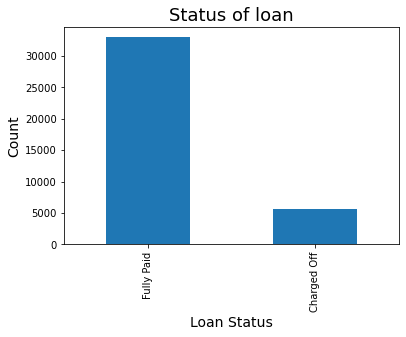

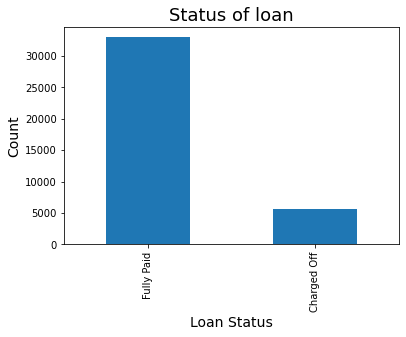

In [42]:
# View the status of loan
plt.title('Status of loan', fontsize=18)
df2.loan_status.value_counts().plot(kind='bar')
plt.xlabel('Loan Status',fontsize=14)
plt.ylabel('Count',fontsize=14)

- Fully paid loan = 32950 , Charged off loan = 5627

In [43]:
# Analyse purpose
df2.purpose.value_counts()/df2.shape[0]*100

debt_consolidation   46.80
credit_card          13.03
other                10.02
home_improvement      7.45
major_purchase        5.57
small_business        4.55
car                   3.89
wedding               2.40
medical               1.77
moving                1.49
vacation              0.97
house                 0.95
educational           0.84
renewable_energy      0.26
Name: purpose, dtype: float64

debt_consolidation   46.80
credit_card          13.03
other                10.02
home_improvement      7.45
major_purchase        5.57
small_business        4.55
car                   3.89
wedding               2.40
medical               1.77
moving                1.49
vacation              0.97
house                 0.95
educational           0.84
renewable_energy      0.26
Name: purpose, dtype: float64

- Purpose wise top six loan category are Debt-consolidation,Credit-card,other,home-improvement,major-purchase,small-business

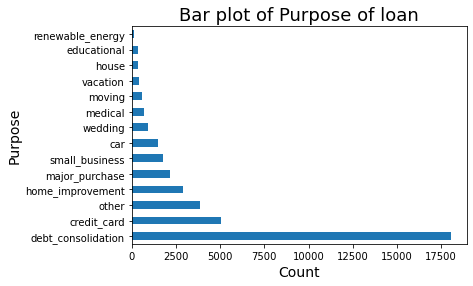

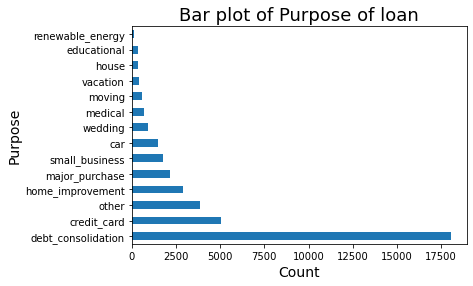

In [44]:
# View the value count of purpose
plt.title('Bar plot of Purpose of loan', fontsize=18)
df2.purpose.value_counts().plot(kind='barh')
plt.xlabel('Count',fontsize=14)
plt.ylabel('Purpose',fontsize=14)
plt.show()

In [45]:
# Analyse loan grade
df2.grade.value_counts()/df2.shape[0]*100

B   30.26
A   26.04
C   20.31
D   13.18
E    6.90
F    2.53
G    0.78
Name: grade, dtype: float64

B   30.26
A   26.04
C   20.31
D   13.18
E    6.90
F    2.53
G    0.78
Name: grade, dtype: float64

- B-Grade has the highest percentage of loan followed by A,C,D,E,F and G

In [46]:
# Analyse sub grade of loans
df2.sub_grade.value_counts()/df2.shape[0]*100

A4   7.45
B3   7.32
A5   7.04
B5   6.78
B4   6.32
C1   5.33
B2   5.19
C2   5.01
A3   4.69
B1   4.66
A2   3.91
C3   3.86
D2   3.33
C4   3.13
C5   2.99
A1   2.95
D3   2.89
D1   2.41
D4   2.38
D5   2.16
E1   1.87
E2   1.59
E3   1.34
E4   1.10
E5   1.00
F1   0.79
F2   0.60
F3   0.45
F4   0.39
F5   0.29
G1   0.24
G2   0.20
G4   0.14
G3   0.12
G5   0.08
Name: sub_grade, dtype: float64

A4   7.45
B3   7.32
A5   7.04
B5   6.78
B4   6.32
C1   5.33
B2   5.19
C2   5.01
A3   4.69
B1   4.66
A2   3.91
C3   3.86
D2   3.33
C4   3.13
C5   2.99
A1   2.95
D3   2.89
D1   2.41
D4   2.38
D5   2.16
E1   1.87
E2   1.59
E3   1.34
E4   1.10
E5   1.00
F1   0.79
F2   0.60
F3   0.45
F4   0.39
F5   0.29
G1   0.24
G2   0.20
G4   0.14
G3   0.12
G5   0.08
Name: sub_grade, dtype: float64

In [47]:
# Analyse home ownership
df2.home_ownership.value_counts()/df2.shape[0]*100

RENT       47.90
MORTGAGE   44.12
OWN         7.71
OTHER       0.25
NONE        0.01
Name: home_ownership, dtype: float64

RENT       47.90
MORTGAGE   44.12
OWN         7.71
OTHER       0.25
NONE        0.01
Name: home_ownership, dtype: float64

- Rent has highest percent followed by mortgage,own,other and none.

In [48]:
# Analyse Number of derogatory public records
df2.pub_rec.value_counts()/df2.shape[0]*100

0   94.63
1    5.22
2    0.12
3    0.02
4    0.01
Name: pub_rec, dtype: float64

0   94.63
1    5.22
2    0.12
3    0.02
4    0.01
Name: pub_rec, dtype: float64

- Most users have 0 number of derogatory public records

In [49]:
# Analyse verification status
df2.verification_status.value_counts()/df2.shape[0]*100

Not Verified      43.27
Verified          31.64
Source Verified   25.08
Name: verification_status, dtype: float64

Not Verified      43.27
Verified          31.64
Source Verified   25.08
Name: verification_status, dtype: float64

- Percentage of Verified loan is less than not verified loan

#### Numeric Variables

In [50]:
# List Numeric columns and convert to numeric
num_cols = ['installment','loan_amnt','funded_amnt','funded_amnt_inv','total_pymnt','annual_inc','emp_length','int_rate','dti','revol_util']
df2[num_cols] = df2[num_cols].apply(pd.to_numeric)

In [51]:
# Analyse Numeric columns
num_cols_amt = ['installment','loan_amnt','funded_amnt','funded_amnt_inv','total_pymnt','annual_inc']
df2[num_cols_amt].describe()

,installment,loan_amnt,funded_amnt,funded_amnt_inv,total_pymnt,annual_inc
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00
mean,322.47,11047.03,10784.06,10222.48,11866.97,68777.97
std,208.64,7348.44,7090.31,7022.72,8809.86,64218.68
min,15.69,500.00,500.00,0.00,0.00,4000.00
25%,165.74,5300.00,5200.00,5000.00,5513.50,40000.00
50%,277.86,9600.00,9550.00,8733.44,9674.05,58868.00
75%,425.55,15000.00,15000.00,14000.00,16136.95,82000.00
max,1305.19,35000.00,35000.00,35000.00,58563.68,6000000.00


,installment,loan_amnt,funded_amnt,funded_amnt_inv,total_pymnt,annual_inc
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00
mean,322.47,11047.03,10784.06,10222.48,11866.97,68777.97
std,208.64,7348.44,7090.31,7022.72,8809.86,64218.68
min,15.69,500.00,500.00,0.00,0.00,4000.00
25%,165.74,5300.00,5200.00,5000.00,5513.50,40000.00
50%,277.86,9600.00,9550.00,8733.44,9674.05,58868.00
75%,425.55,15000.00,15000.00,14000.00,16136.95,82000.00
max,1305.19,35000.00,35000.00,35000.00,58563.68,6000000.00


All values are in Dollars , 25% - 1st Quarrtile , 50% - Median , 75% - 3rd Quartile
- Instalment amount varies from 15.69 to 1305.19 with a mean of  322.47.
- Loan amount varies from 500 to 35000 with a mean of  11047.03.
- Funded amount varies from 500 to 35000 with a mean of 10784.06
- Funded amount Inverse varies from 0.00 to 35000 with a mean of 10322.48.
- Total payment amount varies from 0.00 to  58563.68 with a mean of 11866.97
- Annual income amount varies from 4000 to 6000000 with a mean of 6877.97. There, is one outlier value of 6000000

In [52]:
# Analyse Numeric columns
num_cols_pctt = ['emp_length','int_rate','dti','revol_util']
df2[num_cols_pctt].describe()

,emp_length,int_rate,dti,revol_util
count,38577.00,38577.00,38577.00,38577.00
mean,5.08,11.93,13.27,48.64
std,3.60,3.69,6.67,28.40
min,0.00,5.42,0.00,0.00
25%,2.00,8.94,8.13,25.10
50%,4.00,11.71,13.37,49.00
75%,9.00,14.38,18.56,72.20
max,10.00,24.40,29.99,99.90


,emp_length,int_rate,dti,revol_util
count,38577.00,38577.00,38577.00,38577.00
mean,5.08,11.93,13.27,48.64
std,3.60,3.69,6.67,28.40
min,0.00,5.42,0.00,0.00
25%,2.00,8.94,8.13,25.10
50%,4.00,11.71,13.37,49.00
75%,9.00,14.38,18.56,72.20
max,10.00,24.40,29.99,99.90


25% - 1st Quarrtile , 50% - Median , 75% - 3rd Quartile
- Length of employment varies from 0 to 10 with a mean of 5.08 years.
- Interest rate varies from 5.42% to 24.40% with a mean of 11.93%.
- Debt to Income ratio varies from 0 to 29.99 % with a mean of 13.27%.
- Revolving utility varies from 0 to 99.9% with a mean of 48.64%.

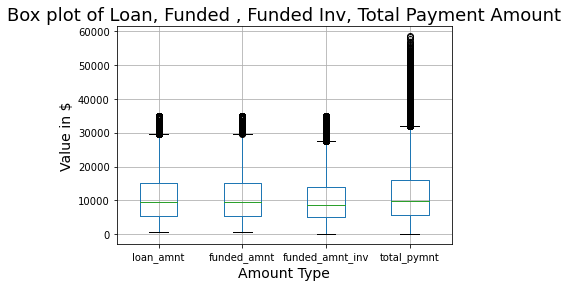

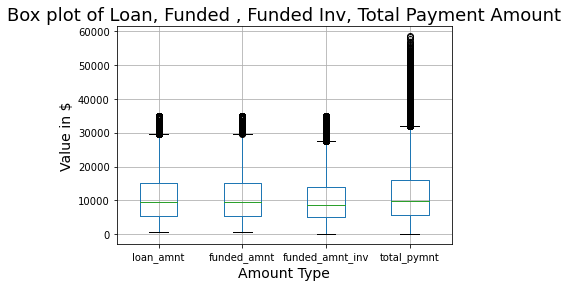

In [53]:
plt.title('Box plot of Loan, Funded , Funded Inv, Total Payment Amount', fontsize=18)
boxplot = df2.boxplot(column=[ 'loan_amnt', 'funded_amnt','funded_amnt_inv','total_pymnt'])
plt.xlabel('Amount Type',fontsize=14)
plt.ylabel('Value in $',fontsize=14)
plt.show()

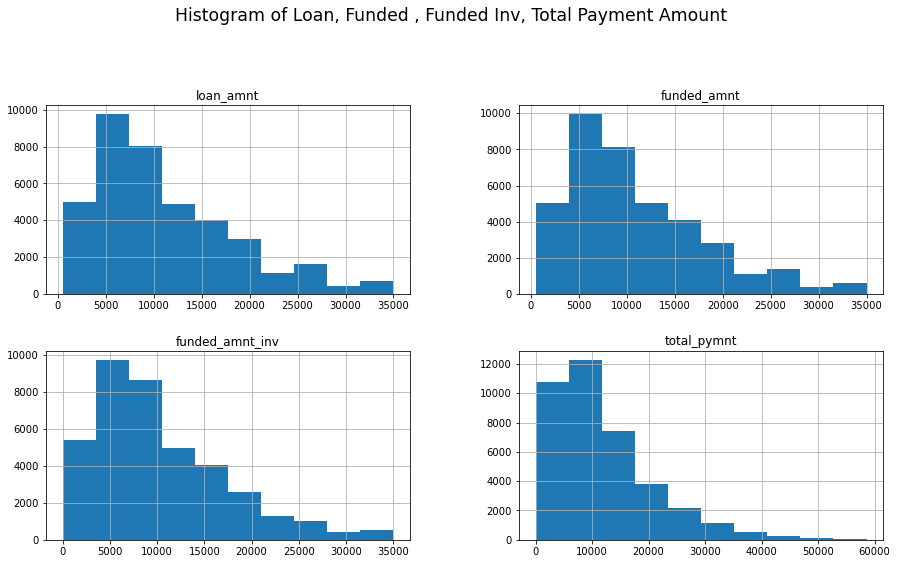

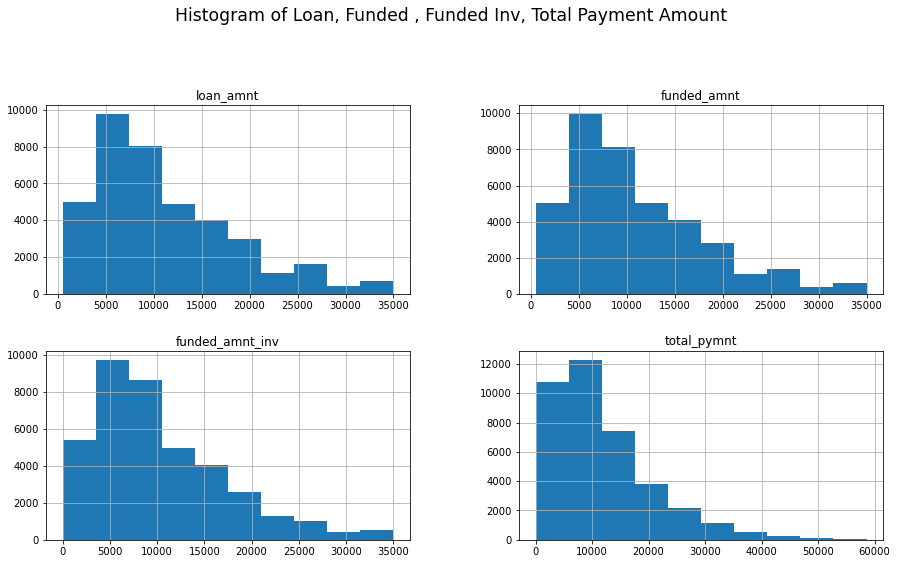

In [54]:
#Histogram of Loan, Funded , Funded Inv, Total Payment Amount'
fig,axes = df2.hist(column=['loan_amnt', 'funded_amnt','funded_amnt_inv','total_pymnt'],figsize=(15,8))
plt.suptitle('Histogram of Loan, Funded , Funded Inv, Total Payment Amount', x=0.5, y=1.05, ha='center', fontsize='xx-large')
#fig.text(0.5, 0.04, 'common X', ha='center')
#fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
plt.show()

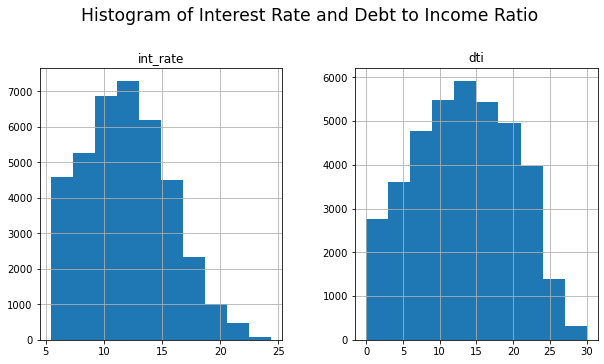

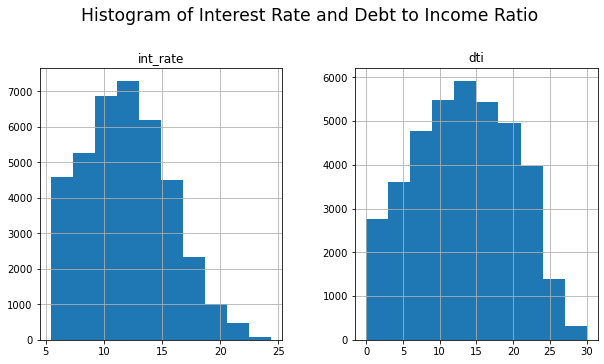

In [55]:
# Histogram of Interest Rate and Debt to Income Ratio
df2.hist(column=['int_rate', 'dti'],figsize=(10,5))
plt.suptitle('Histogram of Interest Rate and Debt to Income Ratio', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.show()

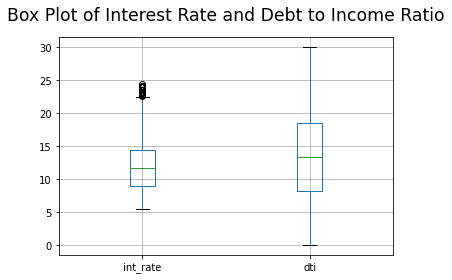

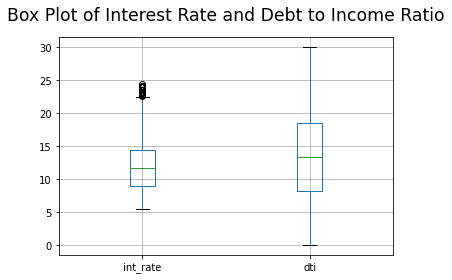

In [56]:
boxplot2 = df2.boxplot(column=['int_rate', 'dti'])
plt.title('Box Plot of Interest Rate and Debt to Income Ratio', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.show()

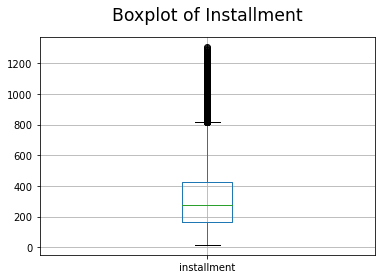

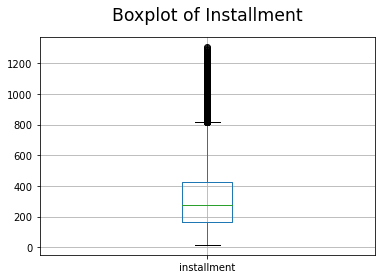

In [57]:
boxplot3 = df2.boxplot(column=['installment'])
plt.title('Boxplot of Installment', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.show()

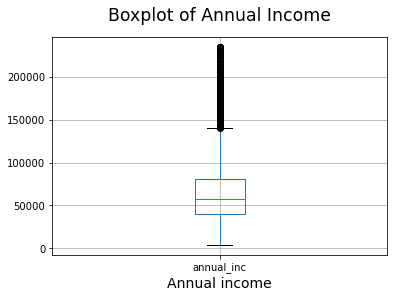

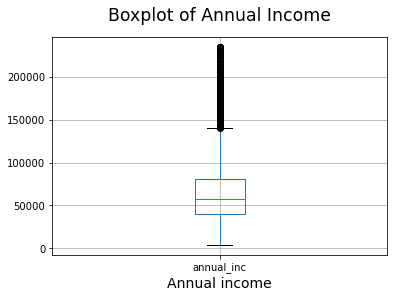

In [58]:
# Remove Outliers from Annual Income and Plot
df4 = df2[df2["annual_inc"] < df2["annual_inc"].quantile(0.99)]
boxplot4 = df4.boxplot(column=['annual_inc'])
plt.title('Boxplot of Annual Income', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.xlabel('Annual income',fontsize=14)
plt.show()

In [59]:
# Analyse annual income after removing outlier
df4.annual_inc.describe()

count    38191.00
mean     65313.61
std      35150.77
min       4000.00
25%      40000.00
50%      58000.00
75%      80232.00
max     234000.00
Name: annual_inc, dtype: float64

count    38191.00
mean     65313.61
std      35150.77
min       4000.00
25%      40000.00
50%      58000.00
75%      80232.00
max     234000.00
Name: annual_inc, dtype: float64

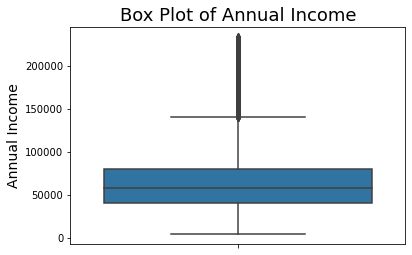

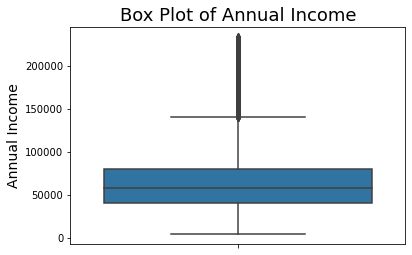

In [60]:
plt.title('Box Plot of Annual Income',fontsize=18)
sns.boxplot(y=df4['annual_inc'])
plt.ylabel('Annual Income',fontsize=14)
plt.show()

### Bi Variate Analysis

In [61]:
# Pivot table of Loan Status and Interest Rate
pd.pivot_table(data=df2, index="loan_status", values = "int_rate", aggfunc="mean")

,int_rate
loan_status,
Charged Off,13.82
Fully Paid,11.61


,int_rate
loan_status,
Charged Off,13.82
Fully Paid,11.61


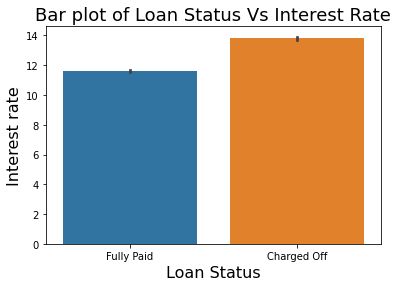

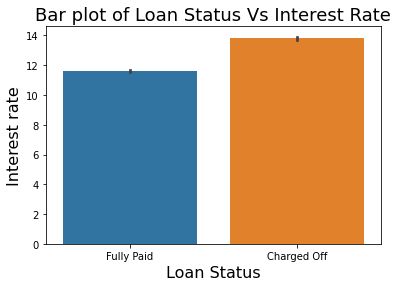

In [62]:
plt.title('Bar plot of Loan Status Vs Interest Rate', fontsize=18)
sns.barplot(data=df2, x="loan_status", y = "int_rate", estimator=np.mean)
plt.xlabel('Loan Status', fontsize=16)
plt.ylabel('Interest rate', fontsize=16)
plt.show()

- Fully paid loans have a lower mean interest rate of 11.61%.
- Charged off loan have a higher mean interest rate of 13.82%.

In [63]:
# Pivot table of Loan Status and Interest Rate
pd.pivot_table(data=df2, index="loan_status", values = "int_rate", aggfunc="median")

,int_rate
loan_status,
Charged Off,13.61
Fully Paid,11.49


,int_rate
loan_status,
Charged Off,13.61
Fully Paid,11.49


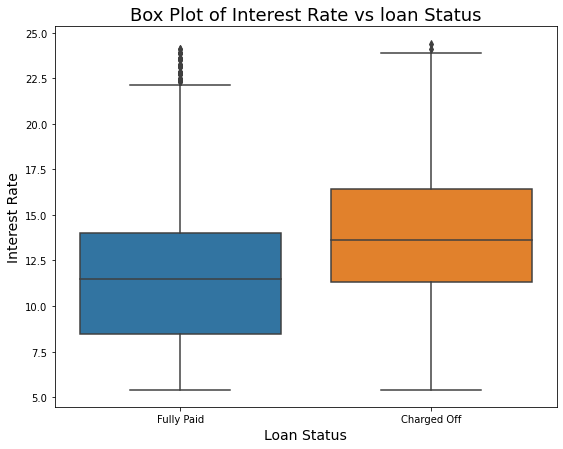

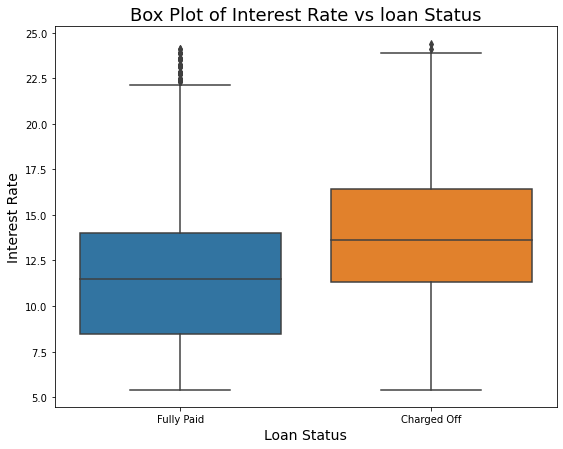

In [64]:
plt.figure(figsize=[9,7])
plt.title('Box Plot of Interest Rate vs loan Status', fontsize=18)
sns.boxplot(df2["loan_status"], df2["int_rate"])
plt.xlabel('Loan Status',fontsize=14)
plt.ylabel('Interest Rate',fontsize=14)
plt.show()

- Fully paid loans have a lower median interest rate of 11.49%.
- Charged off loan have a higher median interest rate of 13.61%.

In [65]:
# Pivot table of Loan Status and Annual Income
pd.pivot_table(data=df2, index="loan_status", values = "annual_inc", aggfunc="mean")

,annual_inc
loan_status,
Charged Off,62427.30
Fully Paid,69862.50


,annual_inc
loan_status,
Charged Off,62427.30
Fully Paid,69862.50


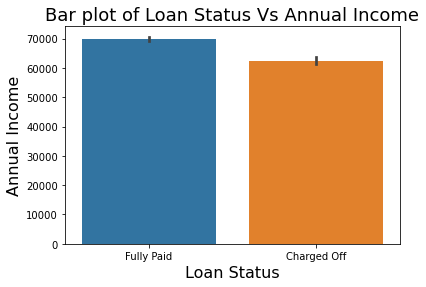

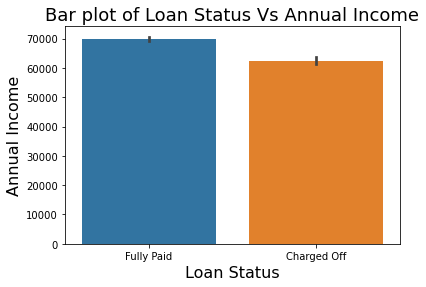

In [66]:
plt.title('Bar plot of Loan Status Vs Annual Income', fontsize=18)
sns.barplot(data=df2, x="loan_status", y = "annual_inc", estimator=np.mean)
plt.xlabel('Loan Status', fontsize=16)
plt.ylabel('Annual Income', fontsize=16)
plt.show()

Values in Dollars
- Fully paid loans have a higher mean annual income of around 62427.30.
- Charged off loan have a lower mean annual income of around 69862.50.

In [67]:
# Pivot table of Loan Status and Debt to Income Ration
pd.pivot_table(data=df2, index="loan_status", values = "dti", aggfunc="mean")

,dti
loan_status,
Charged Off,14.00
Fully Paid,13.15


,dti
loan_status,
Charged Off,14.00
Fully Paid,13.15


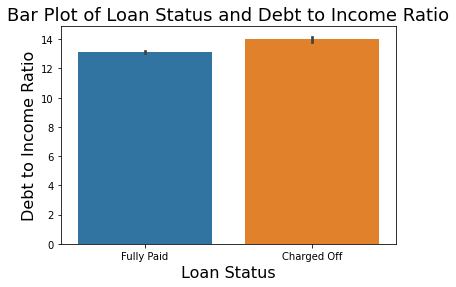

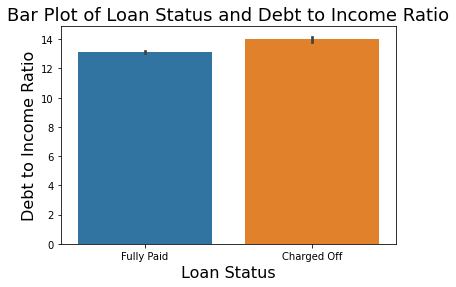

In [68]:
plt.title('Bar Plot of Loan Status and Debt to Income Ratio', fontsize=18)
sns.barplot(data=df2, x="loan_status", y = "dti", estimator=np.mean)
plt.xlabel('Loan Status', fontsize=16)
plt.ylabel('Debt to Income Ratio', fontsize=16)
plt.show()

- Fully paid loans have a lower mean debt to income ratio of 13.15%.
- Charged off loan have a higher mean debt to income ratio 14%.

In [69]:
# Crosstab of Loan Status and Term
pd.crosstab(df2['loan_status'], df2['term'])

term,36 months,60 months
loan_status,,
Charged Off,3227,2400
Fully Paid,25869,7081


term,36 months,60 months
loan_status,,
Charged Off,3227,2400
Fully Paid,25869,7081


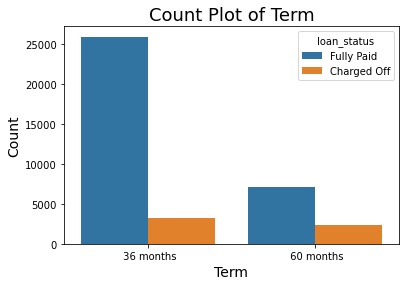

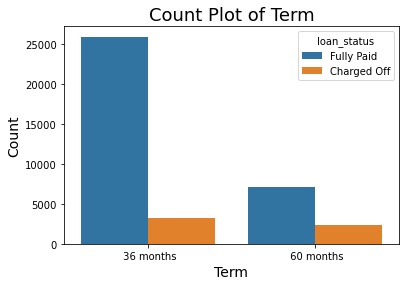

In [70]:
plt.title('Count Plot of Term', fontsize=18)
sns.countplot(data=df2,x="term",hue='loan_status')
plt.xlabel('Term',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

- Loans are provided for 36 months (3 years) and 60 months (5 years).
- Most of the loans are for 36 months duration.
- No: of 36 months loans fully paid = 25869  
- No: of 60 months loans fully paid = 7081


In [71]:
# Pivot table of Term and Interest Rate
pd.pivot_table(data=df2, index="term", values = "int_rate", aggfunc="median")

,int_rate
term,
36 months,10.99
60 months,14.91


,int_rate
term,
36 months,10.99
60 months,14.91


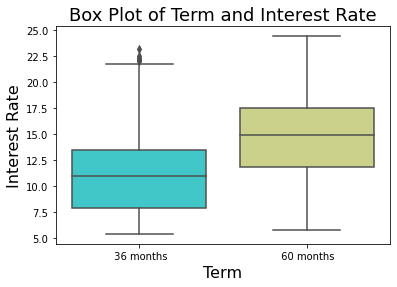

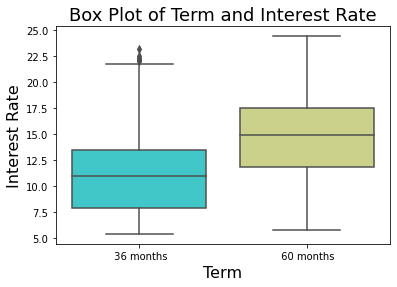

In [72]:
plt.title('Box Plot of Term and Interest Rate', fontsize=18)
sns.boxplot(data =df2,y='int_rate', x='term', palette='rainbow')
plt.xlabel('Term', fontsize=16)
plt.ylabel('Interest Rate', fontsize=16)
plt.show()

- 36 months loans have lower interest rates compared to 60 months interest rates.
- Median interest rate of 36 month loan = 10.99
- Median interest rate of 60 month loan = 14.91

In [73]:
# Pivot table of Purpose and Interest Rate
pi=pd.pivot_table(data=df2, index="purpose", values = "int_rate", aggfunc="median").sort_values(by=['int_rate'],ascending=False)
pi

,int_rate
purpose,
small_business,12.84
debt_consolidation,12.29
educational,11.83
house,11.83
wedding,11.62
credit_card,11.49
other,11.49
medical,11.26
moving,11.12


,int_rate
purpose,
small_business,12.84
debt_consolidation,12.29
educational,11.83
house,11.83
wedding,11.62
credit_card,11.49
other,11.49
medical,11.26
moving,11.12


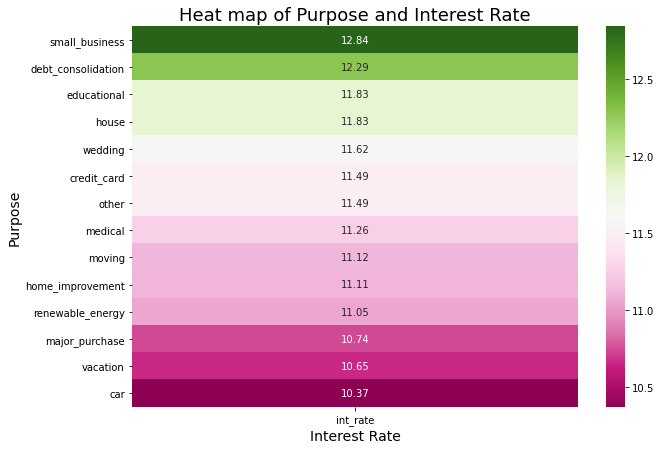

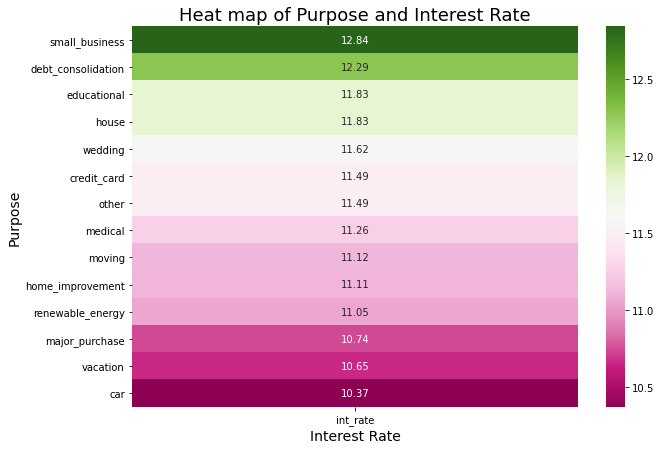

In [74]:
# Heat map of Purpose and Interest Rate
plt.figure(figsize=(10,7))
sns.heatmap(data =pi, cmap="PiYG",annot=True, fmt='.2f') #YlGnBu
plt.title('Heat map of Purpose and Interest Rate', fontsize=18)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Purpose', fontsize=14)
plt.show()

- Highest interest rate is charged for small business followed by debt consolidation,educational,house , wedding etc.
- Interest rate pupose wise varies from 12.84% to 10.37%

In [75]:
# Pivot table of Grade and Interest Rate
pd.pivot_table(data=df2, index="grade", values = "int_rate", aggfunc="median")

,int_rate
grade,
A,7.49
B,10.99
C,13.49
D,15.62
E,17.51
F,19.36
G,20.90


,int_rate
grade,
A,7.49
B,10.99
C,13.49
D,15.62
E,17.51
F,19.36
G,20.90


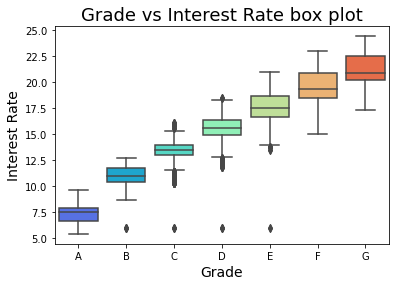

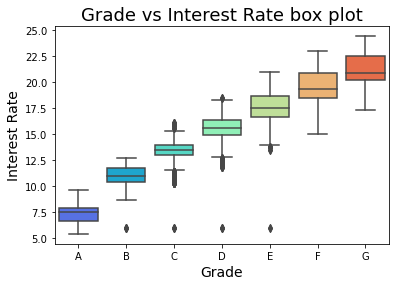

In [76]:
plt.title('Grade vs Interest Rate box plot', fontsize=18)
sns.boxplot(y='int_rate', x='grade', data =df2,palette='rainbow',order = 'ABCDEFG')
plt.xlabel('Grade',fontsize=14)
plt.ylabel('Interest Rate',fontsize=14)
plt.show()

- Grade A has the lowest interest rate and Grade G has the highest interest rate.
- Median Interest rate grade wise varies from 7.49% to 20.90%

In [77]:
df2['loan_amnt_buckets'] = pd.cut(df2['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])
df2['annual_inc_buckets'] = pd.cut(df2['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
df2['int_rate_buckets'] = pd.cut(df2['int_rate'], [0, 7.5, 10, 15, 20], labels=['0-7.5', '7.5-10', '10-15', '15 +'])
df2['dti_buckets'] = pd.cut(df2['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [78]:
# Crosstab of Interest Rate Buckets and Term
pd.crosstab(df2['term'],df2['int_rate_buckets'])

int_rate_buckets,0-7.5,7.5-10,10-15,15 +
term,,,,
36 months,5183,6357,14188,3295
60 months,187,589,4077,3931


int_rate_buckets,0-7.5,7.5-10,10-15,15 +
term,,,,
36 months,5183,6357,14188,3295
60 months,187,589,4077,3931


- For 36 months maximum number of loans are provided in 10-15%
- For 60 monhs maximum number of loans are provided in 10-15%.

In [79]:
# Crosstab of Debt to Income Buckets and Term
pd.crosstab(df2['term'],df2['dti_buckets'])

dti_buckets,0-5,05-10,10-15,15-20,25+
term,,,,,
36 months,3946,6183,7212,6468,4739
60 months,938,1690,2418,2343,1839


dti_buckets,0-5,05-10,10-15,15-20,25+
term,,,,,
36 months,3946,6183,7212,6468,4739
60 months,938,1690,2418,2343,1839


- For 36 months maximum number of loans are provided in 10-15%
- For 60 monhs maximum number of loans are provided in 10-15 %.

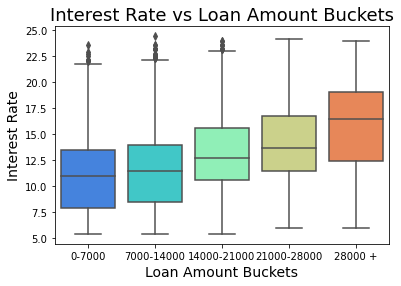

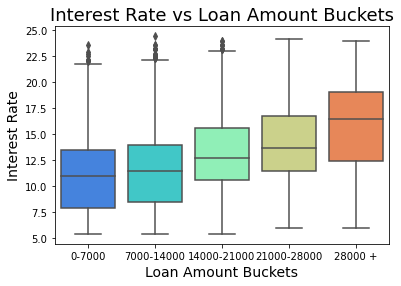

In [80]:
plt.title('Interest Rate vs Loan Amount Buckets',fontsize=18)
sns.boxplot(y='int_rate', x='loan_amnt_buckets', data =df2,palette='rainbow')
plt.xlabel('Loan Amount Buckets', fontsize=14)
plt.ylabel('Interest Rate', fontsize=14)
plt.show()

- As the loan amount increases interest rate increases

In [81]:
# Pivot table of Grade and Annual Income 
pd.pivot_table(df2,index=['loan_status'],columns=['grade'],values=['annual_inc'],aggfunc=np.mean)

annual_inc                                                       
grade                A        B        C        D        E        F         G
loan_status                                                                  
Charged Off   52510.37 59637.70 58642.15 62356.42 73260.93 80346.77  78869.33
Fully Paid    67584.99 68662.63 69618.87 69954.38 79453.81 85004.33 102130.90

annual_inc                                                       
grade                A        B        C        D        E        F         G
loan_status                                                                  
Charged Off   52510.37 59637.70 58642.15 62356.42 73260.93 80346.77  78869.33
Fully Paid    67584.99 68662.63 69618.87 69954.38 79453.81 85004.33 102130.90

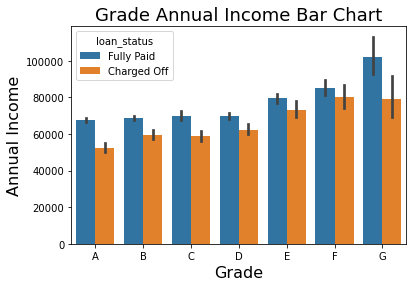

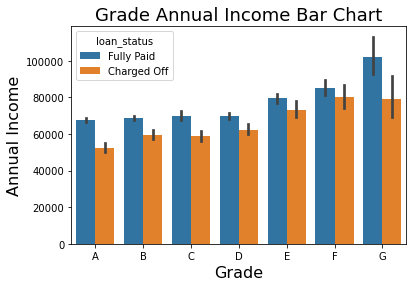

In [82]:
plt.title('Grade Annual Income Bar Chart', fontsize=18)
sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=df2, estimator=np.mean,order='ABCDEFG')
plt.xlabel('Grade', fontsize=16)
plt.ylabel('Annual Income', fontsize=16)
plt.show()

- No clear trend observed in this graph

In [83]:
# Pivot table of Year wise Interest Rate
pd.pivot_table(df2,index=['issue_year'],values=['int_rate'],aggfunc=np.median)

,int_rate
issue_year,
2007,10.28
2008,11.03
2009,12.21
2010,11.49
2011,11.71


,int_rate
issue_year,
2007,10.28
2008,11.03
2009,12.21
2010,11.49
2011,11.71


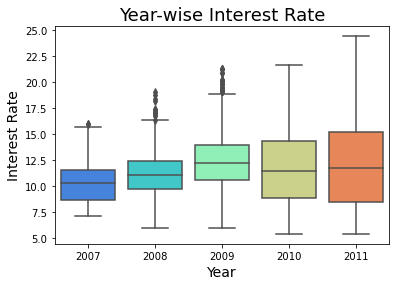

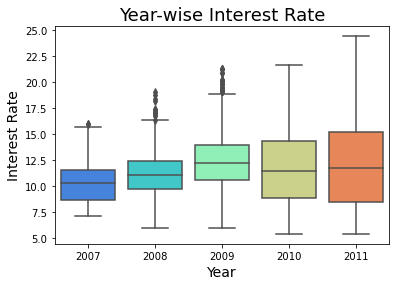

In [84]:
plt.title('Year-wise Interest Rate',fontsize=18)
sns.boxplot(y='int_rate', x='issue_year', data =df2,palette='rainbow')
plt.xlabel('Year',fontsize=14)
plt.ylabel('Interest Rate',fontsize=14)
plt.show()

- Median Interest rate was the highest in 2009.
- Highest Variation was in 2011

In [85]:
# Year Mothwise Interest rate Pivot Table
pd.pivot_table(df2,index=['issue_year'],columns=['issue_month'],values=['int_rate'],aggfunc=np.mean).fillna(0)

int_rate                                                        \
issue_month       1     2     3     4     5     6     7     8     9     10   
issue_year                                                                   
2007            0.00  0.00  0.00  0.00  0.00 13.75  9.25 10.29 10.08 10.81   
2008           10.55 10.74 11.14 11.08 10.47 10.61 10.76 11.59 10.96 11.25   
2009           12.15 12.63 12.50 12.27 11.99 11.79 12.00 12.00 12.09 12.36   
2010           12.17 11.55 11.57 11.60 11.81 12.39 12.15 12.73 12.36 11.67   
2011           11.11 11.69 11.95 11.72 12.53 12.16 12.16 11.96 11.61 11.89   

                         
issue_month    11    12  
issue_year               
2007         9.80 10.66  
2008        11.66 11.98  
2009        12.31 12.22  
2010        10.56 10.70  
2011        12.35 13.07

int_rate                                                        \
issue_month       1     2     3     4     5     6     7     8     9     10   
issue_year                                                                   
2007            0.00  0.00  0.00  0.00  0.00 13.75  9.25 10.29 10.08 10.81   
2008           10.55 10.74 11.14 11.08 10.47 10.61 10.76 11.59 10.96 11.25   
2009           12.15 12.63 12.50 12.27 11.99 11.79 12.00 12.00 12.09 12.36   
2010           12.17 11.55 11.57 11.60 11.81 12.39 12.15 12.73 12.36 11.67   
2011           11.11 11.69 11.95 11.72 12.53 12.16 12.16 11.96 11.61 11.89   

                         
issue_month    11    12  
issue_year               
2007         9.80 10.66  
2008        11.66 11.98  
2009        12.31 12.22  
2010        10.56 10.70  
2011        12.35 13.07

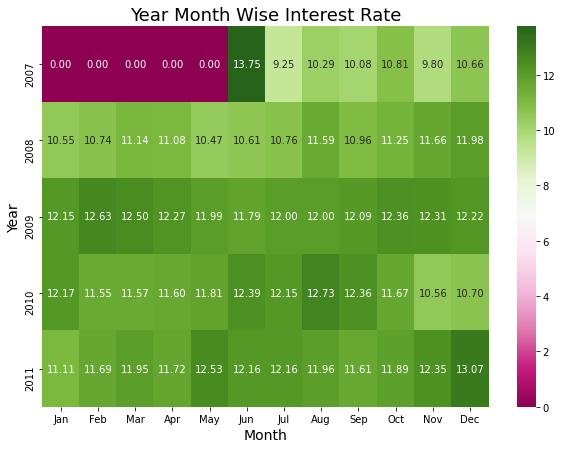

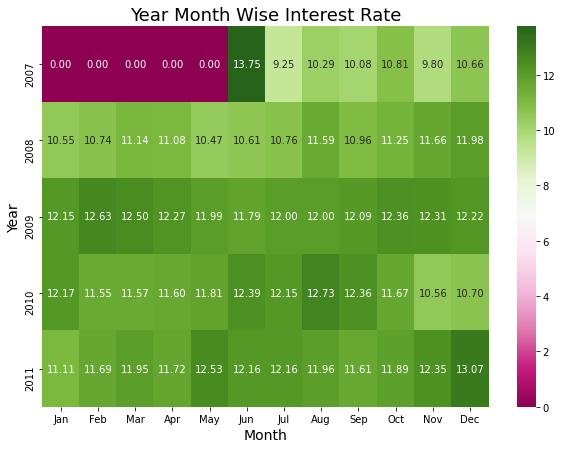

In [86]:
int_rate_hm = pd.pivot_table(df2,index=['issue_year'],columns=['issue_month'],values=['int_rate'],aggfunc=np.mean).fillna(0)
plt.figure(figsize = (10,7))
plt.title('Year Month Wise Interest Rate', fontsize=18)
#xticks= [1,2,3,4,5,6,7,8,9,10,11,12]
xticks= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.heatmap(int_rate_hm, annot=True, fmt='.2f' , cmap='PiYG', xticklabels=xticks)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.show()

In [87]:
# Annual income against Charged off Percent -
inc_range_loan = df2.groupby(['annual_inc_buckets', 'loan_status']).loan_status.count().unstack().reset_index()
inc_range_loan['Total'] = inc_range_loan['Charged Off'] + inc_range_loan['Fully Paid'] 
inc_range_loan['Chargedoff_Percent'] = inc_range_loan['Charged Off']*100 / inc_range_loan['Total']
inc_range_loan.sort_values('Chargedoff_Percent', ascending=False) 

loan_status,annual_inc_buckets,Charged Off,Fully Paid,Total,Chargedoff_Percent
0,0-20000,237,943,1180,20.08
1,20000-40000,1514,7004,8518,17.77
2,40000-60000,1729,9534,11263,15.35
3,60000-80000,1024,6597,7621,13.44
4,80000 +,1122,8859,9981,11.24


loan_status,annual_inc_buckets,Charged Off,Fully Paid,Total,Chargedoff_Percent
0,0-20000,237,943,1180,20.08
1,20000-40000,1514,7004,8518,17.77
2,40000-60000,1729,9534,11263,15.35
3,60000-80000,1024,6597,7621,13.44
4,80000 +,1122,8859,9981,11.24


- Higher Income range Above 80000  has less chances of charged off.
- Low Income range between 0 and 20000 has high chances of charged off.
- As income increases charged off percent decreases.

In [88]:
# Purpose of Loan against Charged off Percent.
pur_stat = df2.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
pur_stat['Total'] = pur_stat['Charged Off'] + pur_stat['Fully Paid'] 
pur_stat['Chargedoff_Percent'] = pur_stat['Charged Off']*100 / pur_stat['Total']
pur_stat.sort_values('Chargedoff_Percent', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Percent
11,small_business,475,1279,1754,27.08
10,renewable_energy,19,83,102,18.63
3,educational,56,269,325,17.23
9,other,633,3232,3865,16.38
5,house,59,308,367,16.08
8,moving,92,484,576,15.97
7,medical,106,575,681,15.57
2,debt_consolidation,2767,15288,18055,15.33
12,vacation,53,322,375,14.13
4,home_improvement,347,2528,2875,12.07


loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Percent
11,small_business,475,1279,1754,27.08
10,renewable_energy,19,83,102,18.63
3,educational,56,269,325,17.23
9,other,633,3232,3865,16.38
5,house,59,308,367,16.08
8,moving,92,484,576,15.97
7,medical,106,575,681,15.57
2,debt_consolidation,2767,15288,18055,15.33
12,vacation,53,322,375,14.13
4,home_improvement,347,2528,2875,12.07


- Small Business applicants have high chances of getting charged off.

In [89]:
# Grade against Charged off  Percent
gr_stat = df2.groupby(['grade', 'loan_status']).loan_status.count().unstack().reset_index()
gr_stat['Total'] = gr_stat['Charged Off']+gr_stat['Fully Paid'] 
gr_stat['Chargedoff_Percent'] = gr_stat['Charged Off']*100 / gr_stat['Total']
gr_stat.sort_values('Chargedoff_Percent', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Percent
6,G,101,198,299,33.78
5,F,319,657,976,32.68
4,E,715,1948,2663,26.85
3,D,1118,3967,5085,21.99
2,C,1347,6487,7834,17.19
1,B,1425,10250,11675,12.21
0,A,602,9443,10045,5.99


loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Percent
6,G,101,198,299,33.78
5,F,319,657,976,32.68
4,E,715,1948,2663,26.85
3,D,1118,3967,5085,21.99
2,C,1347,6487,7834,17.19
1,B,1425,10250,11675,12.21
0,A,602,9443,10045,5.99


- Grade "A" has least chance of charged off.
- Grade "F" and "G" have the highest chances of charged off.

In [90]:
# Interest rate against Charged off Percent
int_rate_status = df2.groupby(['int_rate_buckets', 'loan_status']).loan_status.count().unstack().reset_index()
int_rate_status['Total']=int_rate_status['Charged Off']+int_rate_status['Fully Paid'] 
int_rate_status['Chargedoff_Percent'] = int_rate_status['Charged Off']*100 / int_rate_status['Total']
int_rate_status.sort_values('Chargedoff_Percent', ascending=False)

loan_status,int_rate_buckets,Charged Off,Fully Paid,Total,Chargedoff_Percent
3,15 +,1794,5432,7226,24.83
2,10-15,2707,15558,18265,14.82
1,7.5-10,574,6372,6946,8.26
0,0-7.5,256,5114,5370,4.77


loan_status,int_rate_buckets,Charged Off,Fully Paid,Total,Chargedoff_Percent
3,15 +,1794,5432,7226,24.83
2,10-15,2707,15558,18265,14.82
1,7.5-10,574,6372,6946,8.26
0,0-7.5,256,5114,5370,4.77


- Interest rate less than 10% has very less chances of charged off. 
- Interest rate more than 15% has the highest  chances of charged off.
- Charged off percent is increasing with higher intrest rates.
- Highest number of loans are provided in interest rate range of 10% to 15%

In [91]:
# Pub rec against Charged off Percent
pub_rec_stat = df2.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().reset_index().fillna(0)
pub_rec_stat['Total']=pub_rec_stat['Charged Off']+pub_rec_stat['Fully Paid'] 
pub_rec_stat['Chargedoff_Percent'] = pub_rec_stat['Charged Off']*100 / pub_rec_stat['Total']
pub_rec_stat.sort_values('Chargedoff_Percent', ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_Percent
1,1,457.00,1556.00,2013.00,22.70
2,2,10.00,38.00,48.00,20.83
0,0,5160.00,31347.00,36507.00,14.13
3,3,0.00,7.00,7.00,0.00
4,4,0.00,2.00,2.00,0.00


loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_Percent
1,1,457.00,1556.00,2013.00,22.70
2,2,10.00,38.00,48.00,20.83
0,0,5160.00,31347.00,36507.00,14.13
3,3,0.00,7.00,7.00,0.00
4,4,0.00,2.00,2.00,0.00


- Charged off percent is high where 1 or 2 derogatory public records exists.
- For 3 or 4 derogatory public records the data is insufficient.

In [92]:
# Pub rec bankruptcies against Charged off Percent
pub_recb_stat = df2.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().reset_index().fillna(0)
pub_recb_stat['Total']=pub_recb_stat['Charged Off']+pub_recb_stat['Fully Paid'] 
pub_recb_stat['Chargedoff_Percent'] = pub_recb_stat['Charged Off']*100 / pub_recb_stat['Total']
pub_recb_stat.sort_values('Chargedoff_Percent', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Percent
2,2.00,2,3,5,40.00
1,1.00,366,1271,1637,22.36
3,NA,118,579,697,16.93
0,0.00,5141,31097,36238,14.19


loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Percent
2,2.00,2,3,5,40.00
1,1.00,366,1271,1637,22.36
3,NA,118,579,697,16.93
0,0.00,5141,31097,36238,14.19


- Charged off percent is high where 1 or 2  public record bankruptcies exists.
- For few cases the  public record bankruptcies is not known.

In [93]:
# Home Ownership against Charged off Percent
home_own_stat = df2.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().reset_index().fillna(0)
home_own_stat['Total']=home_own_stat['Charged Off']+home_own_stat['Fully Paid'] 
home_own_stat['Chargedoff_Percent'] = home_own_stat['Charged Off']*100 / home_own_stat['Total']
home_own_stat.sort_values('Chargedoff_Percent', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Percent
2,OTHER,18.00,80.00,98.00,18.37
4,RENT,2839.00,15641.00,18480.00,15.36
3,OWN,443.00,2532.00,2975.00,14.89
0,MORTGAGE,2327.00,14694.00,17021.00,13.67
1,NONE,0.00,3.00,3.00,0.00


loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Percent
2,OTHER,18.00,80.00,98.00,18.37
4,RENT,2839.00,15641.00,18480.00,15.36
3,OWN,443.00,2532.00,2975.00,14.89
0,MORTGAGE,2327.00,14694.00,17021.00,13.67
1,NONE,0.00,3.00,3.00,0.00


- There is no significant difference in charge off percent for variuos categories.
- For none the data is insufficient.
- Majority loans are awarded in Rent and Mortgage categories.

In [94]:
# Employment Length against Charged off Percent
emp_len_status = df2.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().reset_index()
emp_len_status['Total']=emp_len_status['Charged Off']+emp_len_status['Fully Paid'] 
emp_len_status['Chargedoff_Percent'] = emp_len_status['Charged Off']*100 / emp_len_status['Total']
emp_len_status.sort_values('Chargedoff_Percent', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Percent
10,10,1559,7962,9521,16.37
7,7,263,1448,1711,15.37
1,1,456,2713,3169,14.39
5,5,458,2736,3194,14.34
0,0,639,3869,4508,14.17
6,6,307,1861,2168,14.16
8,8,203,1232,1435,14.15
3,3,555,3457,4012,13.83
4,4,462,2880,3342,13.82
2,2,567,3724,4291,13.21


loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Percent
10,10,1559,7962,9521,16.37
7,7,263,1448,1711,15.37
1,1,456,2713,3169,14.39
5,5,458,2736,3194,14.34
0,0,639,3869,4508,14.17
6,6,307,1861,2168,14.16
8,8,203,1232,1435,14.15
3,3,555,3457,4012,13.83
4,4,462,2880,3342,13.82
2,2,567,3724,4291,13.21


- Charged off percent does not show any relationship with Employment length.

In [95]:
pd.pivot_table(df2,index=['emp_length'],values=['annual_inc'], aggfunc='median')

,annual_inc
emp_length,
0,50000.00
1,51996.00
2,52000.00
3,55137.00
4,57998.00
5,57996.00
6,60000.00
7,60000.00
8,60000.00


,annual_inc
emp_length,
0,50000.00
1,51996.00
2,52000.00
3,55137.00
4,57998.00
5,57996.00
6,60000.00
7,60000.00
8,60000.00


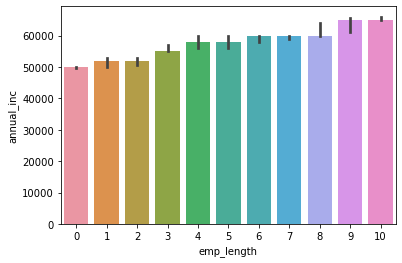

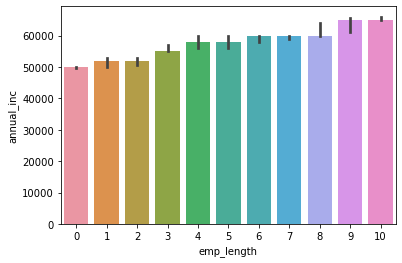

In [96]:
sns.barplot(data=df2, x="emp_length", y = "annual_inc", estimator=np.median)
plt.show()

- Median Income Increases with length of employment but the percentage change is very less.

In [97]:
df_co = df2[(df2['loan_status']=='Charged Off')]
pd.pivot_table(df_co,index=['issue_year'],columns=['issue_month'],values=['loan_status'], aggfunc='count').fillna(0)

loan_status                                                   \
issue_month          1      2      3      4      5      6      7      8    
issue_year                                                                 
2007               0.00   0.00   0.00   0.00   0.00   0.00   0.00   7.00   
2008              31.00  25.00  40.00  27.00  10.00   7.00  17.00   6.00   
2009              28.00  34.00  31.00  40.00  42.00  43.00  47.00  40.00   
2010              76.00  63.00  69.00  82.00 125.00 166.00 137.00 148.00   
2011             186.00 168.00 207.00 221.00 289.00 267.00 278.00 267.00   

                                         
issue_month     9      10     11     12  
issue_year                               
2007          3.00  10.00   7.00  18.00  
2008          5.00  15.00  31.00  33.00  
2009         57.00  87.00  83.00  62.00  
2010        175.00 160.00 142.00 142.00  
2011        307.00 308.00 335.00 423.00

loan_status                                                   \
issue_month          1      2      3      4      5      6      7      8    
issue_year                                                                 
2007               0.00   0.00   0.00   0.00   0.00   0.00   0.00   7.00   
2008              31.00  25.00  40.00  27.00  10.00   7.00  17.00   6.00   
2009              28.00  34.00  31.00  40.00  42.00  43.00  47.00  40.00   
2010              76.00  63.00  69.00  82.00 125.00 166.00 137.00 148.00   
2011             186.00 168.00 207.00 221.00 289.00 267.00 278.00 267.00   

                                         
issue_month     9      10     11     12  
issue_year                               
2007          3.00  10.00   7.00  18.00  
2008          5.00  15.00  31.00  33.00  
2009         57.00  87.00  83.00  62.00  
2010        175.00 160.00 142.00 142.00  
2011        307.00 308.00 335.00 423.00

In [98]:
# Year Month against Charged off Percent
ym_stat = df2.groupby(['issue_year','issue_month','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
ym_stat['Total'] = ym_stat['Charged Off'] + ym_stat['Fully Paid'] 
ym_stat['Chargedoff_Percent'] = ym_stat['Charged Off']*100 / ym_stat['Total']
ym_stat.sort_values('Chargedoff_Percent', ascending=False)

loan_status,issue_year,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Percent
4,2007,10,10.00,37.00,47.00,21.28
2,2007,8,7.00,26.00,33.00,21.21
6,2007,12,18.00,67.00,85.00,21.18
54,2011,12,423.00,1619.00,2042.00,20.71
13,2008,7,17.00,66.00,83.00,20.48
5,2007,11,7.00,30.00,37.00,18.92
7,2008,1,31.00,140.00,171.00,18.13
47,2011,5,289.00,1320.00,1609.00,17.96
10,2008,4,27.00,128.00,155.00,17.42
9,2008,3,40.00,196.00,236.00,16.95


loan_status,issue_year,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Percent
4,2007,10,10.00,37.00,47.00,21.28
2,2007,8,7.00,26.00,33.00,21.21
6,2007,12,18.00,67.00,85.00,21.18
54,2011,12,423.00,1619.00,2042.00,20.71
13,2008,7,17.00,66.00,83.00,20.48
5,2007,11,7.00,30.00,37.00,18.92
7,2008,1,31.00,140.00,171.00,18.13
47,2011,5,289.00,1320.00,1609.00,17.96
10,2008,4,27.00,128.00,155.00,17.42
9,2008,3,40.00,196.00,236.00,16.95


- December 2011 has the highest percentage of charged.
- August , October , December 2007 also have the same value of charged off but the data is very less.
- Charged off percent ranges from 0 to 21%..

In [99]:
# Numpy version check
np.__version__

'1.20.1'

'1.20.1'

In [100]:
# Pandas version check
pd.__version__

'1.2.4'

'1.2.4'

In [101]:
# Matplotlib version check
import matplotlib
matplotlib.__version__

'3.3.4'

'3.3.4'

In [102]:
# Seaborn version check
sns.__version__

'0.11.1'

'0.11.1'

In [103]:
# Python Version
from platform import python_version
print(python_version())

3.8.8
3.8.8


In [104]:
#fig = plt.figure()
#plt.figure(figsize=(15,8))
#plt.plot(data)
#fig.suptitle('test title', fontsize=20)
#plt.xlabel('xlabel', fontsize=16)
#plt.ylabel('ylabel', fontsize=16)
#fig.savefig('test.jpg')
#pd.pivot_table(index=['loan_status','verification_status'],data=df2,aggfunc={'dti':np.mean,'int_rate':np.mean})

In [105]:
#pd.pivot_table(df2,index=['loan_status'],columns=['issue_year'],values=['int_rate'],aggfunc=np.mean)
#pd.pivot_table(df2,index=['loan_status'],columns=['issue_year'],values=['dti'],aggfunc=np.mean)
#pd.pivot_table(df2[(df2['loan_status']=='Charged Off')],index=['issue_year'],columns=['loan_status','issue_month'],values=['int_rate'],aggfunc=np.mean)